<a href="https://colab.research.google.com/github/Cherow/Mercy_Cherotich_week8_datasciencecore_moringascholl/blob/main/MercyCherotich_week8_moringaschool_datasciencecore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 8 independent project

## 1. Defining the Question

### a) Specifying the Question


Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

   1. Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



### b) Defining the Metric for Success

The metrics of success will be measured using the accuracy score 0f at least 90% and confusion matrix that predict at 3/4 correct observations

### c) Understanding the context 
The data is vital to medics are they will know the major features that causes 	hypothyroid and can also be able to tell if the person has it or not given the various variables

### d) Recording the Experimental Design

The experimental design used is Crisp-DM

### e) Data Relevance

The data was relevant and was what we neededthough it had some missing values

## 2. Reading the Data

In [25]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [26]:
# Loading the Dataset
url = '/content/hypothyroid.csv'
data = pd.read_csv(url,na_values='?') 
#

## 3. Checking the Data

In [27]:
# Determining the no. of records in our dataset
#
data.shape

(3163, 26)

In [28]:
# Previewing the top of our dataset
#
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [29]:
# Previewing the bottom of our dataset
# 
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,NaN
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,NaN
3162,negative,56.0,F,t,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.8,y,139.0,y,0.97,y,143.0,n,NaN


In [30]:
# Checking whether each column has an appropriate datatype
#
data.info()
#the age,tsh,t3,tt4,t4u,fit should be numeric but is object so we need to convert to numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [31]:
#checking the unique values in the columns
data.nunique()



status                         2
age                           92
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          239
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          268
T4U_measured                   2
T4U                          158
FTI_measured                   2
FTI                          280
TBG_measured                   2
TBG                           52
dtype: int64

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [32]:
# Checking for null values in our data
data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [33]:
#TBG has alot of missing values so we drop them and also the TBG measured since they were no records taken
data.drop(['TBG','TBG_measured'],axis = 1,inplace=True)
#for the sex we fill it with the mode since in is categorical but the rest we fill it with the mean
data['sex'].fillna(data['sex'].mode()[0],inplace = True )
data.isnull().sum()
#filling in the remaining columns with mean but we first need to convert them to numeric
df = data[['age','TSH','T3','TT4','T4U','FTI',]] 
df = df.apply(pd.to_numeric,errors = 'coerce') 
#filling in the null values with mean
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)
df.isnull().sum()

age    0
TSH    0
T3     0
TT4    0
T4U    0
FTI    0
dtype: int64

In [34]:
#getting list of categorical data
df_1 =data.drop(df,axis = 1) 
df_1.isnull().sum()
#concating df and df_1
hosp_data = pd.concat([df,df_1],axis = 1)
hosp_data.head()

,age,TSH,T3,TT4,T4U,FTI,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured
0,72.0,30.0,0.6,15.0,1.48,10.0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y
1,15.0,145.0,1.7,19.0,1.13,17.0,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y
2,24.0,0.0,0.2,4.0,1.00,0.0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y
3,24.0,430.0,0.4,6.0,1.04,6.0,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y
4,77.0,7.3,1.2,57.0,1.28,44.0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y


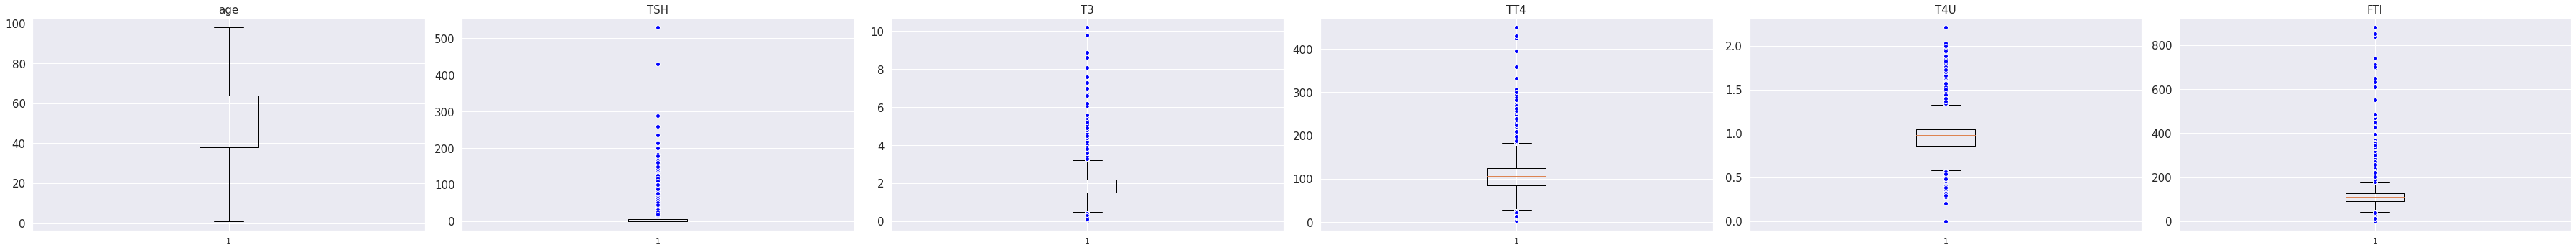

In [35]:
#checking of outliers in our dataset
#
hosp_data
blue_circle = dict(markerfacecolor = 'blue', marker='o',markeredgecolor = 'white')
fig,axs = plt.subplots(1, len(df.columns),figsize = (50,5))
for i , ax in enumerate (axs.flat):
  ax.boxplot(df.iloc[:,i],flierprops=blue_circle)
  ax.set_title(df.columns[i],fontsize= 15)
  ax.tick_params(axis = 'y',labelsize = 15)
plt.tight_layout()
#the data has some outliers but we wont remove them since they are instances of rara occurance

In [36]:
#checking for duplicates in our data set
hosp_data.duplicated().sum()
#our data has 156 duplicates
#checking the duplicates
duplicates = hosp_data[hosp_data.duplicated()]
duplicates
#we wont drop the duplicates  since the numeric values are the  not same


,age,TSH,T3,TT4,T4U,FTI,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured
53,69.000000,21.00000,0.800000,53.00,0.860000,61.000000,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y
66,62.000000,100.00000,0.400000,10.00,1.000000,10.000000,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y
124,77.000000,23.00000,0.500000,33.00,0.670000,49.000000,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y
128,79.000000,29.00000,1.600000,47.00,0.970000,48.000000,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y
131,50.000000,34.00000,1.939749,55.00,0.930000,60.000000,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,y,n,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,74.000000,21.00000,1.800000,126.00,1.180000,107.000000,negative,F,t,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y
3071,51.154214,5.92318,1.939749,108.85,0.978199,115.397771,negative,F,f,f,f,f,f,f,f,f,f,f,f,n,n,n,n,n
3111,89.000000,1.30000,0.900000,82.00,0.800000,103.000000,negative,M,f,f,f,f,f,f,f,f,f,f,f,y,y,y,y,y
3124,40.000000,5.92318,1.939749,108.85,0.978199,115.397771,negative,F,f,f,f,f,f,t,f,f,f,f,f,n,n,n,n,n


## 6. Exploratory Analysis

 1.univariate analysis

F    2255
M     908
Name: sex, dtype: int64


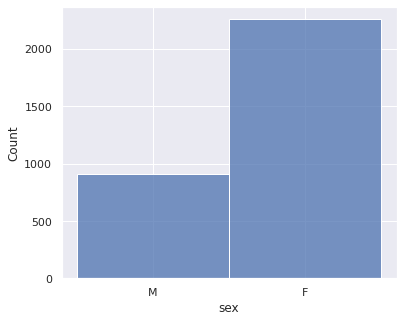

In [37]:
#frequency count for the categorical data
print(hosp_data['sex'].value_counts())
#the were more female tested than the men
#visualising the counts using histogram
sns.set(rc = {'figure.figsize':(6,5)})

sns.histplot(hosp_data['sex'],bins=2,binwidth=0.9)

f    3064
t      99
Name: goitre, dtype: int64


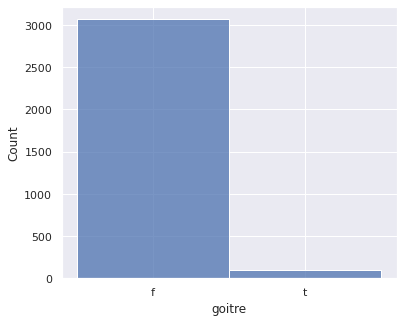

In [38]:
#frequency count for the categorical data
print(hosp_data['goitre'].value_counts())
#more patients did not have goitre
#visualising the counts
sns.histplot(hosp_data['goitre'],bins = 2)

negative       3012
hypothyroid     151
Name: status, dtype: int64


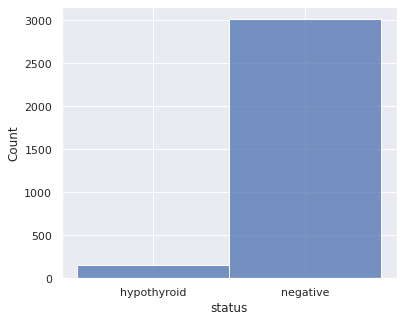

In [39]:
#frequency count for the categorical data
print(hosp_data['status'].value_counts())
#more patients tested negative for the hypthyroid
#visualising the counts
sns.histplot(hosp_data['status'],bins = 2)

f    3100
t      63
Name: pregnant, dtype: int64


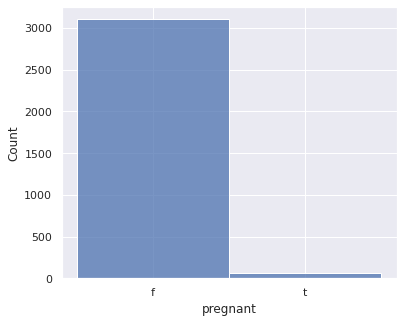

In [40]:
#frequency count for the categorical data
print(hosp_data['pregnant'].value_counts())
#the were fewer number of pregnancy
#visualising the counts
sns.histplot(hosp_data['pregnant'],bins = 2)

f    3064
t      99
Name: sick, dtype: int64


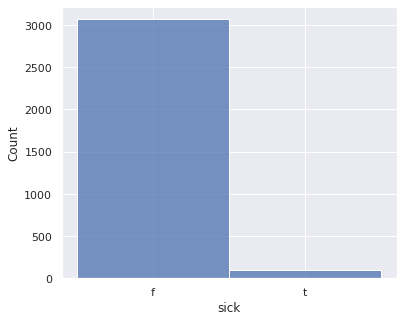

In [41]:
#frequency count for the categorical data
print(hosp_data['sick'].value_counts())
#for the people tested more were not sick
#visualising the counts
sns.histplot(hosp_data['sick'],bins = 2)

f    3123
t      40
Name: tumor, dtype: int64


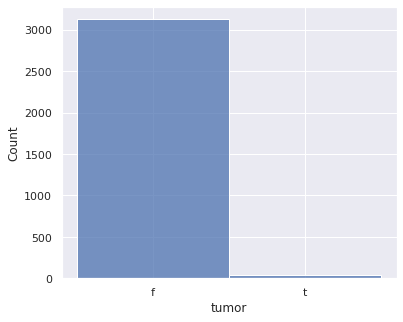

In [42]:
#frequency count for the categorical data
print(hosp_data['tumor'].value_counts())
#the were more female tested than the men
#visualising the counts
sns.histplot(hosp_data['tumor'],bins = 2)

In [43]:
#getting univariate analysis for numerical data
hosp_data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771
std,17.881969,22.060029,0.880441,43.657766,0.217513,57.838927
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.154214,1.000000,1.939749,107.000000,0.978199,110.000000
75%,64.000000,5.923180,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [44]:
#getting kurtosis
hosp_data.kurt()
#TSH,T3,FTI and T3 are leptokurtic  as they have high kurtosis
#age is platykurtic as it have low kurtosis

age     -0.625620
TSH    180.097308
T3      14.017703
TT4      7.810266
T4U      3.963176
FTI     51.464046
dtype: float64

In [45]:
#getting skweness
hosp_data.skew()
#TSH and FTI are highly skwed as they have skweness greater than 2

age    -0.175276
TSH    11.075279
T3      2.401958
TT4     1.571505
T4U     0.954853
FTI     5.317936
dtype: float64

 2.Bivariate Analysis

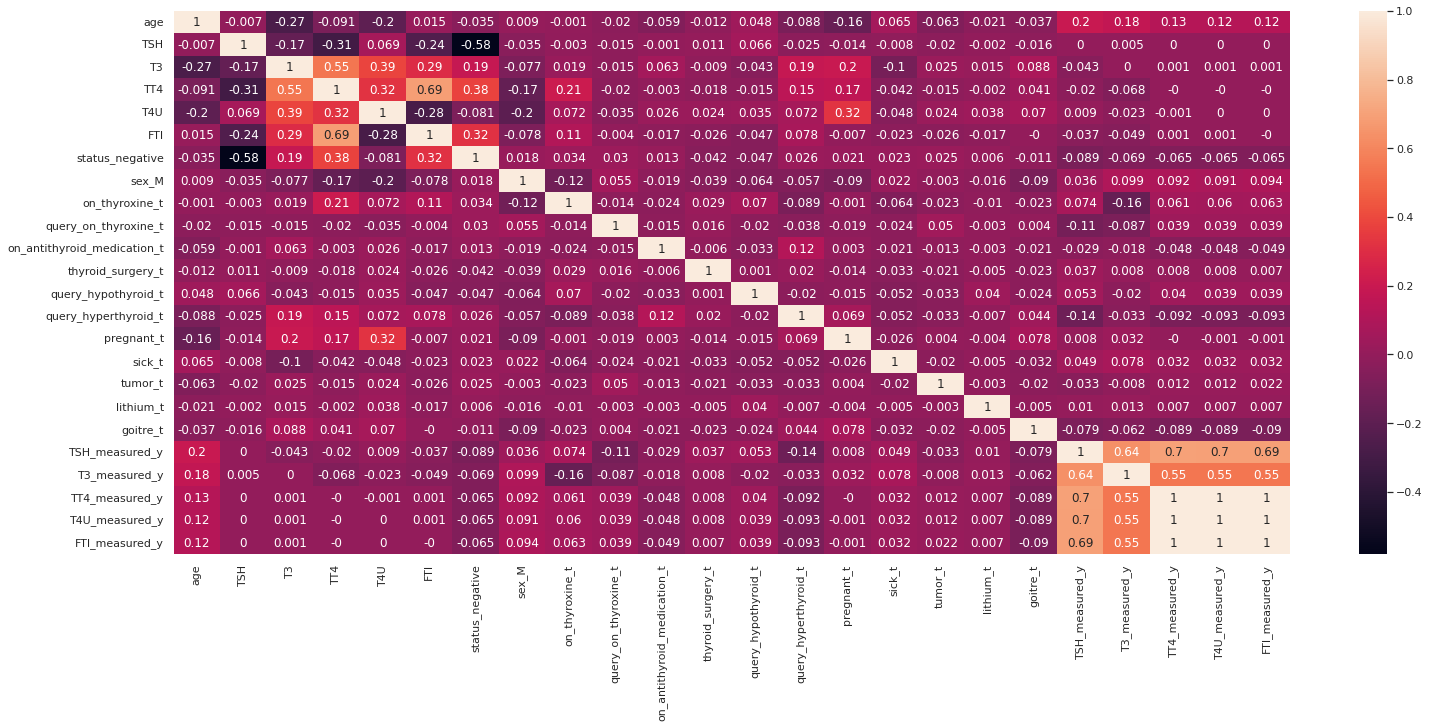

In [46]:
#encoding the data to convert categorical to numeric
hosp_df = pd.get_dummies(hosp_data,drop_first=True)
hosp_df
#finding the correlation matrix
matrix = round(hosp_df.corr(),3)
matrix
#visualising the matrix using heatmap
sns.set(rc = {'figure.figsize':(25,10)})
sns.heatmap(matrix,annot = True)
#the variables not highly correlated

3.Multivariate analysis


In [47]:
#we are going to use LDA since it is supervised
 # Separating our target label (status) from the other features
features= hosp_df.drop(['status_negative'], 1)
hosp_label = hosp_df['status_negative']
test_features=features.columns.to_list()

# Subject our features to LDA model



# Create an instance of LDA
lda = LDA()

lda_= lda.fit(features, hosp_label)
lda_feat = lda_.transform(features)

# Display the coeficients of the reducted columns
lda_.coef_

# Since the coefficients are in an array, we needto create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=features.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
lithium_t,3.750480
T4U_measured_y,2.575033
tumor_t,1.287659
sick_t,1.219488
pregnant_t,1.126683
on_antithyroid_medication_t,1.108869
query_on_thyroxine_t,0.878651
sex_M,0.272201
T3,0.118826
TT4,0.067778


## 7. Implementing the Solution

## part  1

1.Random Forest

In [48]:
#separating the data into label and features
y = hosp_df['status_negative']
X = hosp_df.drop(['status_negative'],axis =1)
#separating the data using train and test test_size = 0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#using gridsearch to get the best number of max_depth,number of tress and min_spits
forest=RandomForestClassifier()
params = {"max_depth": [2,8], "min_samples_split": [1, 3, 10],"n_estimators":[300,500]}
#searching for the best values of our model
search=GridSearchCV(estimator=forest,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
#getting the best value for the max_depth,min_split,n_estimators and the score
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)
#the max_depth is 10,min_samples_split is 3 and n_estimators is 100
#the rmse is 0.01 


{'max_depth': 8, 'min_samples_split': 3, 'n_estimators': 300}


0.012252964426877469

In [ ]:
#we fit the model using the parameters
forest = RandomForestClassifier(max_depth=8,min_samples_split=3,n_estimators=300)
forest.fit(X_train,y_train)
#making prediction
y_pred = forest.predict(X_test)

In [ ]:
# And now we assess the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#the rmse is 0.125 which is low and not far from what we got from the grid search
print('accuracy',metrics.accuracy_score(y_test,y_pred))
#our model is 98.42% accurate


Mean Absolute Error: 2.022116903633491
Mean Squared Error: 0.01579778830963665
Root Mean Squared Error: 0.12568925295997527
accuracy 0.9842022116903634


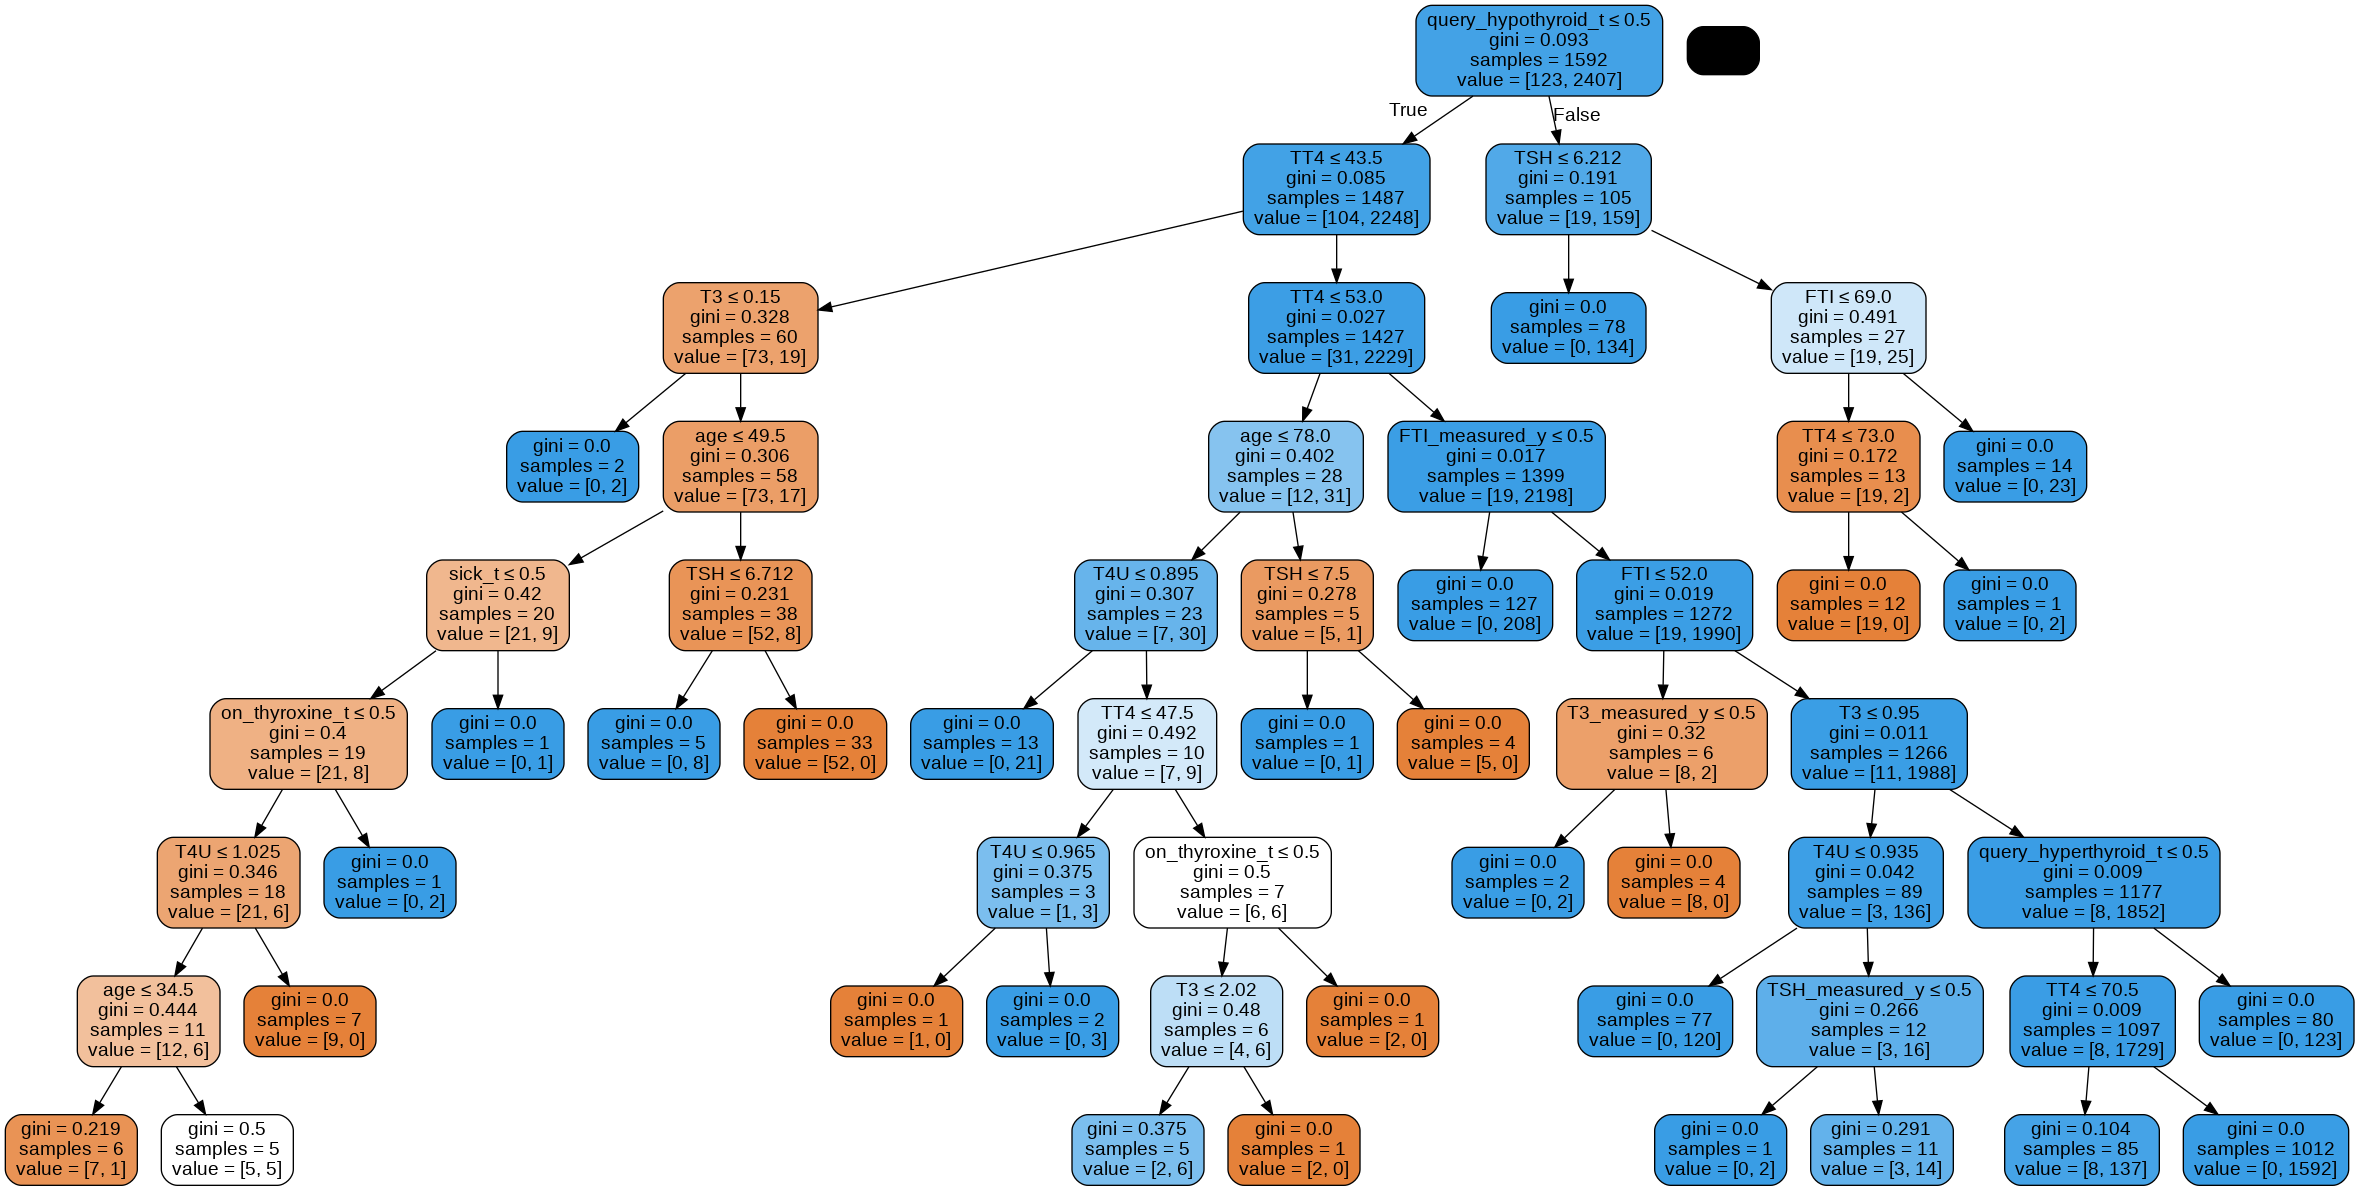

In [ ]:
dot_data = StringIO()
# pick a specific tree from the forest since our forest has 100 trees
#we pick tree 12
tree = forest.estimators_[12]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

In [ ]:
#checking the important features in our data

importances = list(tree.feature_importances_)

# connecting  each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

# sort the values in descending order, since we want  the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
#we can seee our  most important feature is TSH followed by FTI 

Variable: TT4                  Importance: 0.58
Variable: FTI                  Importance: 0.15
Variable: TSH                  Importance: 0.14
Variable: age                  Importance: 0.03
Variable: T4U                  Importance: 0.03
Variable: T3                   Importance: 0.02
Variable: on_thyroxine_t       Importance: 0.02
Variable: T3_measured_y        Importance: 0.02
Variable: query_hypothyroid_t  Importance: 0.01
Variable: sex_M                Importance: 0.0
Variable: query_on_thyroxine_t Importance: 0.0
Variable: on_antithyroid_medication_t Importance: 0.0
Variable: thyroid_surgery_t    Importance: 0.0
Variable: query_hyperthyroid_t Importance: 0.0
Variable: pregnant_t           Importance: 0.0
Variable: sick_t               Importance: 0.0
Variable: tumor_t              Importance: 0.0
Variable: lithium_t            Importance: 0.0
Variable: goitre_t             Importance: 0.0
Variable: TSH_measured_y       Importance: 0.0
Variable: TT4_measured_y       Importance: 0

2.Ada boost

In [ ]:
#using gridsearch to get the best number of max_depth,number of trees using 10 folds cross validations
ada_boost = AdaBoostRegressor()
params = {"n_estimators":[300,500]}
          #,'learning_rate':np.linspace(0.3,1,20)}
#searching for the best values for our parameters
search=GridSearchCV(estimator=ada_boost,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [ ]:
#getting the best value for the learning rate,n_estimators and the score
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)
# n_estimators is 300
#the mse is 0.01 

{'n_estimators': 300}


0.011968951472618302

In [ ]:
#we fit the model using the parameters from gridsearch
Adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=500,random_state=10)
Adaboost.fit(X_train,y_train)
#making prediction
y_pred = Adaboost.predict(X_test)

In [ ]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
#the rmse is 0.131 which is not far from the gridsearch
#the accuracy is 98.26%



Mean Absolute Error: 3.227488151658768
Mean Squared Error: 0.017377567140600316
Root Mean Squared Error: 0.13182400062431848
accuracy: 0.9826224328593997


3.Gradient descent

In [ ]:
#using gridsearch to get the best number of max_depth,number of tress and the learning rate
gradient=GradientBoostingClassifier()
params = {"max_depth": [3,10], "learning_rate": [0.1, 0.7],"n_estimators":[50,100]}
#searching for the best parameters for our model
search=GridSearchCV(estimator=gradient,param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
#getting the best value for the max_depth,min_split,n_estimators and the score
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)
#the max_depth is 3,learning_rate is 100 and n_estimators is 100
#the mse is 0.01


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


0.007905138339920948

In [ ]:
#we fit the model using the parameters from the gridsearch
gradient = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,max_depth=3,random_state=10)
gradient.fit(X_train,y_train)
#making prediction
y_pred = gradient.predict(X_test)

In [ ]:
# And now we assess the errors in our model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
#the rmse is 0.0.12 which is not far from the gridsearch rmse
#the accuracy is 98%

Mean Absolute Error: 3.227488151658768
Mean Squared Error: 0.017377567140600316
Root Mean Squared Error: 0.13182400062431848
accuracy: 0.9826224328593997


from our analysis the randomforest had the highest accuracy of 98.42% followed by gradienboost and adaboost which had accuracy of 98.26%
we worked on improving the accuracy of our model by tuning the parameter.i would prefer the randomforest since it had a higher accuracy

# part 2

1.Linear kernel

In [49]:
#our data has 24 features but we are going to use PCA to reduce the number of our features to 2
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#using the explained variance to get the features
explained_variance = pca.explained_variance_ratio_
explained_variance 
features = pd.DataFrame(explained_variance,X.columns,columns=['variance'])
features.sort_values(by='variance',ascending=False)

,variance
age,7.508432e-01
TSH,1.253944e-01
T3,7.196680e-02
TT4,5.152227e-02
T4U,8.745490e-05
FTI,6.346796e-05
sex_M,3.258854e-05
on_thyroxine_t,2.119793e-05
query_on_thyroxine_t,1.267953e-05
on_antithyroid_medication_t,1.100639e-05


In [50]:
#we are now going to use age and TSH since they are the most important
X = hosp_df[['age','TSH']]
y = hosp_df['status_negative']
# we split data into train and test.test_size =0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
#fitting a svm linear model
linear= SVC(kernel='linear')
linear.fit(X_train,y_train)
#making prediction
y_pred = linear.predict(X_test)

In [52]:
#assessing the performance of our model
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('confusion matrix :',metrics.confusion_matrix(y_test,y_pred))
#our model accuracy is 96.5% and it has correctly predicted 611 out of 633 observations

accuracy: 0.9652448657187994
confusion matrix : [[ 12  14]
 [  8 599]]


2.Polynomial kernel

In [64]:
#using gridsearch to get the best number of max_depth,number of tress and min_spits
polyclassifier = SVC(kernel='linear')
params = {"degree":[2,10], "gamma":[0.001,100]}
#finding the best parameters
search=GridSearchCV(estimator=polyclassifier,param_grid=params,scoring='accuracy',n_jobs=1,refit=True,cv=5)

In [65]:
#getting the best value for the max_depth,min_split,n_estimators and the score
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)
#degree =2 and gamma = 0.001

{'degree': 2, 'gamma': 0.001}


0.9695652173913045

In [73]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=2,gamma=0.001)
# Training the model using the training set
polyclassifier.fit(X_train, y_train)
#using to make prediction
y_pred = polyclassifier.predict(X_test)

In [74]:
#assessing the performance of our model
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('confusion matrix :',metrics.confusion_matrix(y_test,y_pred))
#our model accuracy is 96.6% and it has correctly predicted 612 out of 633 observations

accuracy: 0.966824644549763
confusion matrix : [[ 11  15]
 [  6 601]]


3.rbf kernel

In [69]:
#using gridsearch to get the best number of max_depth,number of tress and min_spits
rbfclassifier = SVC(kernel='rbf')
params = {"C":[0.001,100], "gamma":[0.01,1000]}
#finding the best parameters
search=GridSearchCV(estimator=rbfclassifier,param_grid=params,scoring='accuracy',n_jobs=1,refit=True,cv=10)


In [70]:
#getting the best value for the max_depth,min_split,n_estimators and the score
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)
#c=100.gamma = 0.01

{'C': 100, 'gamma': 0.01}


0.9679841897233201

In [71]:
# Building the model 
rbfclassifier = SVC(kernel='rbf',degree=2,gamma=0.001)
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)
#using to make prediction
y_pred = rbfclassifier.predict(X_test)

In [72]:
#assessing the performance of our model
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('confusion matrix :',metrics.confusion_matrix(y_test,y_pred))
#our model accuracy is 96.5% and it has correctly predicted 611 out of 633 observations

accuracy: 0.9636650868878357
confusion matrix : [[ 14  12]
 [ 11 596]]


from our analysis the polynomial  kernel svm did a good job with 96.7% accuractfowwed by linear kernel with 96.5% and rbf with 96.4% .to improve the accuracy we did some parameter tuning

## 8. Challenging the solution

For the SVM we only selected 2 features that were most important and tuned the parameters for the 2 features instead of using all the features and for the decision trees we tuned the parameters to improve their accuracy

## 9. Follow up questions

### a). Did we have the right data?

yes we had the right data to answer our question on whether a person has hypothyroid or not

### b). Do we need other data to answer our question?

no the data was sufficient to answer our questions

### c). Did we have the right question?

yes we have the right questions that are needed by the medics to know whether a person has hypothyroid or not

## Conclusion

from our analysis we can conclude that the best model one can use is either randomforest or polynomial kernel SVM but there is need to do  a lot of hyperparameter tuning in order to improve the performanc eof our model.The important features also need to be looked into in order to reduce the chances of one having hypothyroid